In [4]:
from sklearn.preprocessing import MinMaxScaler
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


1 ['20230417_171307_FM.png', '20230417_171307_FM.csv', 'norm']
14.74671745300293 -3.62265682220459


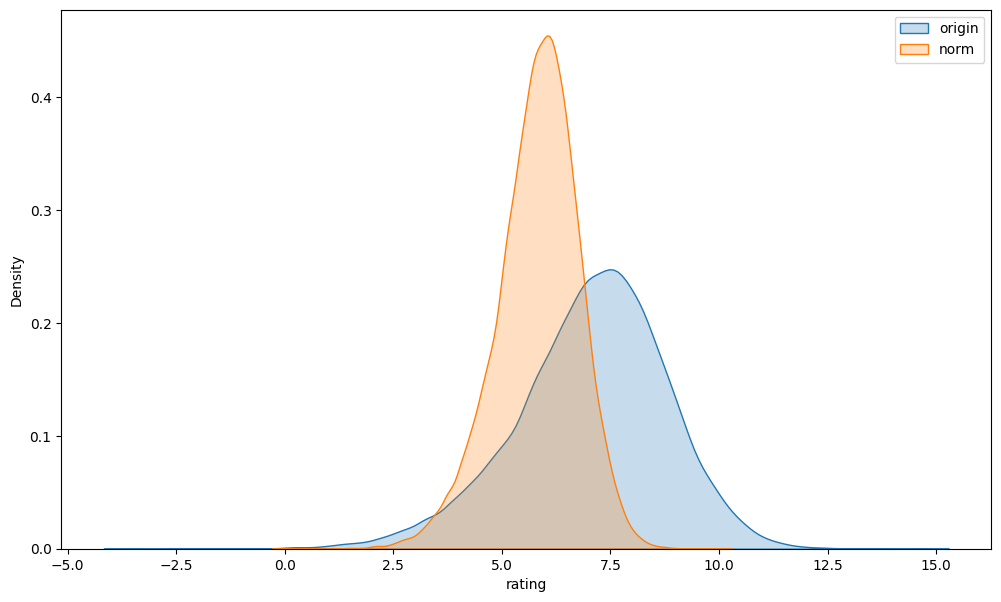

In [37]:
mms = MinMaxScaler(feature_range=(1,10))
# X_train_norm = mms.fit_transform(X_train)
# X_test_norm = mms.transform(X_test)

file_list = os.listdir('./data/')
csv_list = [f for f in file_list if f[-4:] == '.csv']
files = [pd.read_csv('./data/' + f) for f in csv_list]
fig, ax = plt.subplots(figsize=(12, 7))

print(len(files), file_list)
for idx in range(len(files)):
    # X_scaled = X_std * (max - min) + min
    rmin = files[idx]['rating'].min()
    rmax = files[idx]['rating'].max()
    rmean = files[idx]['rating'].mean()
    rating_std = (rmean - rmin) / (rmax - rmin)
    print(rmax,rmin)
    # norm_rating = mms.fit_transform(files[idx]['rating'])
    file_norm = files[idx].copy()
    file_norm['rating'] = file_norm['rating'].apply(lambda x:(x - rmin) / (rmax - rmin) * 10)
    sns.kdeplot(x='rating', data=files[idx],fill=True)
    sns.kdeplot(x='rating', data=file_norm,fill=True)
    plt.legend(labels=['origin','norm'])
    plt.savefig('./data/'+file_list[idx][:-4])
    file_norm.to_csv(csv_list[idx][:-4] + '_norm.csv')
    plt.show(file_list[idx][:-4])